<h1 style = "color: green"> Esercitazione 8 </h1>

L'algoritmo di Metropolis può essere sfruttato anche per risolvere problemi di meccanica quantistica. In particolare, permette di calcolare il valore atteso dell'hamiltoniana per un particolare stato di un sistema campionando il modulo quadro della funzione d'onda relativa a quello stato.  

Possiamo trovare lo stato fondamentale di un sistema non risolvibile analiticamente con un metodo variazionale. Sia $\Psi_T(x)$ la funzione d'onda di prova; il valore atteso dell'hamiltoniana è dato da:
$$\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}$$
dove $E_0$ è l'energia dello stato fondamentale e $\Psi_0$ la sua funzione d'onda.  
Se $\Psi_T(x)$ dipende da alcuni parametri, possiamo variare questi parametri per trovare il minimo di $\langle {\hat H} \rangle_T$, che sarà una buona stima di $E_0$ e dunque $\Psi_T(x)$ approssimerà bene $\Psi_0(x)$ (se partiamo da una "buona" funzione di prova).  

Studiamo quindi il potenziale $V(x) = x^4 - \frac{5}{2}x^2$, partendo dalla funzione di prova $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}} + e^{-\frac{(x+\mu)^2}{2\sigma^2}}$.  

Come metodo variazionale sfruttiamo il metodo del simulated annealing, dove accettiamo una mossa dei parametri $\sigma$ e $\mu$ con sempre minor probabilità, in dipendenza di una temperatura fittizia. A basse temperature quindi accetteremo solo mosse che avvicinano, o almeno non allontanano, il sistema al suo minimo.  

Nel calcolo dell'hamiltoniana assumiamo $\hbar=1$ e $m=1$.

L'esercizio 8.1 consiste nell'implementare il calcolo di $\langle {\hat H} \rangle_T = \int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$, mentre la ricerca dei parametri ottimali è svolta nell'esercizio 8.2.

<h3 style = "color: blue"> Esercizio 8.2 </h3>

I parametri di partenza per il simulated annealing scelti sono $\sigma = 1$ e $\mu = 1$. Come temperatura iniziale scegliamo $T_0=0.1$ poiché per una mossa dei parametri è questo l'ordine di grandezza della differenza tra i valori di $\langle {\hat H} \rangle_T$ prima e dopo la mossa. Raffreddiamo il sistema di $\Delta T = 0.001$ ogni $N_{SA}=10$ mosse.  
$\langle {\hat H} \rangle_T$ è stimata con il metodo della media a blocchi per ottenere anche una stima dell'incertezza, con $N=100$ blocchi di $L=10000$ passi.  

L'andamento di $\langle {\hat H} \rangle_T$ al variare del numero di mosse del simulated annealing e al variare della temperatura è riportato in seguito. Nel primo grafico ogni $N_{SA}=10$ passi cambia la temperatura, nel secondo è utilizzata la stima finale di $\langle {\hat H} \rangle_T$ per ogni temperatura.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# loads a file of 3 colums
def loadFile(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    fileLength = len(lines)
    a = np.empty(fileLength)
    b = np.empty(fileLength)
    c = np.empty(fileLength)
    
    for i in range(fileLength):
        values = lines[i].split()
        a[i], b[i], c[i] = float(values[0]), float(values[1]), float(values[2])

    dataFile.close()

    return a, b, c, fileLength

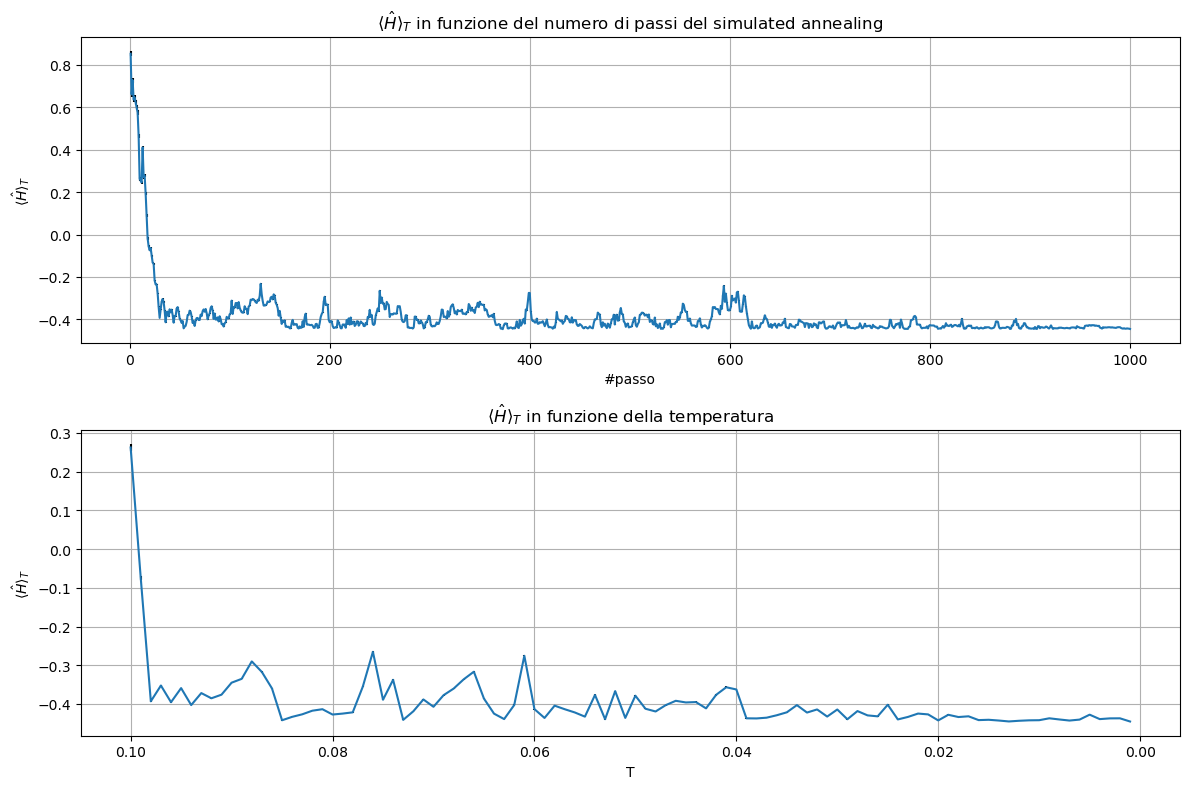

In [2]:
fig, ax = plt.subplots(2, 1, figsize = (12, 8))


# all <H>
temp, mean, error, nSteps = loadFile("code/H.out")
x = np.arange(nSteps) + 1

ax[0].errorbar(x, mean, yerr = error, color = "#1f77b4", ecolor = "black")
ax[0].set(title = r"$\langle {\hat H} \rangle_T$ in funzione del numero di passi del simulated annealing", xlabel = "#passo", ylabel = r"$\langle {\hat H} \rangle_T$")
ax[0].grid(True)


# final <H> for each temperature
spt = 10 # steps per temperature
nTemp = int(nSteps / spt)
finalH = np.empty(nTemp)
finalE = np.empty(nTemp)
finalT = np.empty(nTemp)
for i in range(nTemp):
    finalH[i] = mean[(i + 1) * spt - 1] # access indexes 9, 19, ... 999
    finalE[i] = error[(i + 1) * spt - 1]
    finalT[i] = temp[(i + 1) * spt - 1]

ax[1].errorbar(finalT, finalH, yerr = finalE, color = "#1f77b4", ecolor = "black")
ax[1].invert_xaxis()
ax[1].set(title = r"$\langle {\hat H} \rangle_T$ in funzione della temperatura", xlabel = "T", ylabel = r"$\langle {\hat H} \rangle_T$")
ax[1].grid(True)


fig.tight_layout()
plt.show()

Da entrambi i grafici è evidente come l'algoritmo converga verso il minimo e anche come, a temperature basse, i parametri restino nella zona del minimo facendo oscillare $\langle {\hat H} \rangle_T$ sempre meno.  
Le incertezze risultano troppo basse per essere visualizzate qui.  

I parametri finali sono riportati nello specchietto seguente.

In [3]:
temp, sigmaVec, muVec, nParams = loadFile("code/sigma_mu.out")

sigma = sigmaVec[-1]
mu = muVec[-1]

print("I parametri finali trovati sono:")
print("sigma = %.3f" % sigma)
print("mu = %.3f" % mu)

I parametri finali trovati sono:
sigma = 0.619
mu = 0.812


Con i parametri finali $\sigma$ e $\mu$ possiamo calcolare l'energia dello stato fondamentale e visualizzare la sua media progressiva, con relativa incertezza.

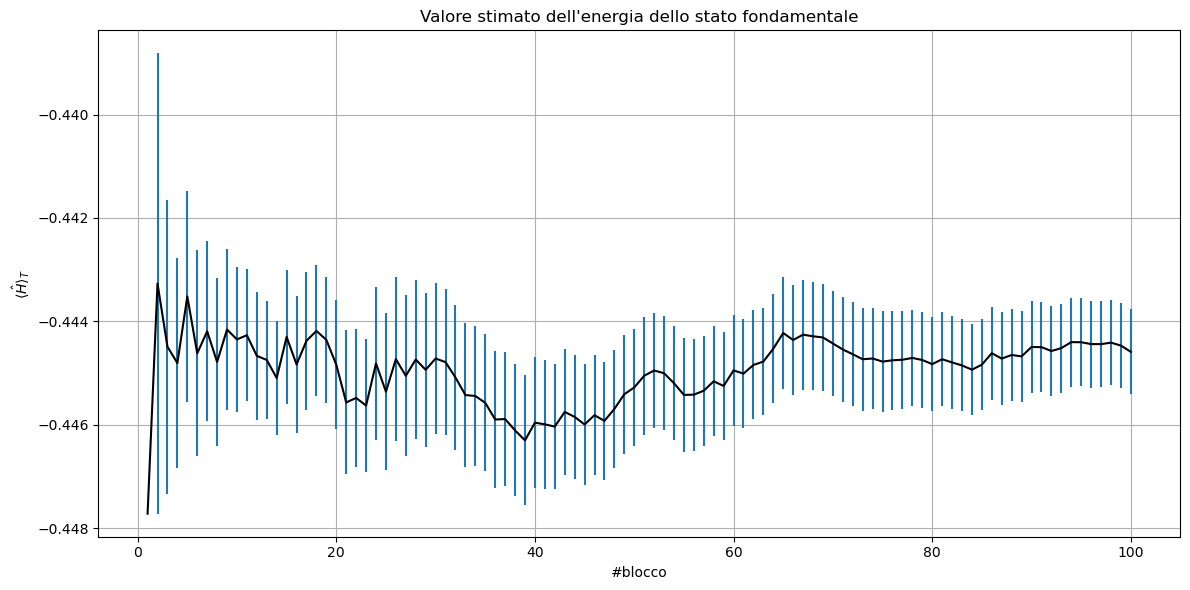

Valore dell'energia dello stato fondamentale:
<H> = -0.4446 +- 0.0008


In [4]:
fig, ax = plt.subplots(figsize = (12, 6))

buffer, mean, error, nBlocks = loadFile("code/hamiltonian.out")
x = np.arange(nBlocks) + 1

ax.errorbar(x, mean, yerr = error, color = "black", ecolor = "#1f77b4")
ax.set(title = "Valore stimato dell'energia dello stato fondamentale", xlabel = "#blocco", ylabel = r"$\langle {\hat H} \rangle_T$")
ax.grid(True)

fig.tight_layout()
plt.show()

print("Valore dell'energia dello stato fondamentale:")
print("<H> = %.4f +- %.4f" % (mean[-1], error[-1]))

Possiamo anche visualizzare l'andamento del simulated annealing nello spazio dei paramentri $\sigma - \mu$.

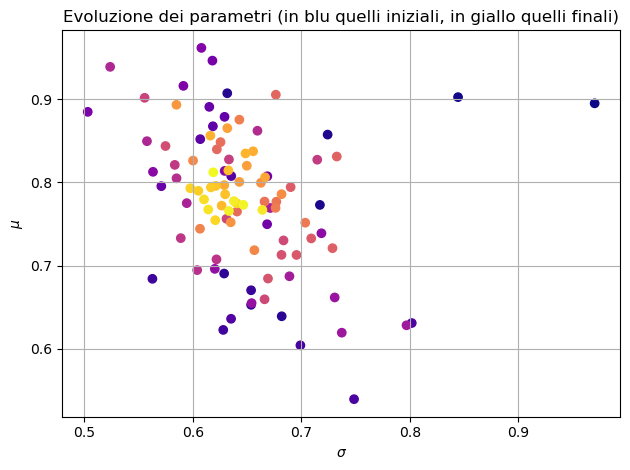

In [5]:
plt.scatter(sigmaVec, muVec, c = temp, cmap = "plasma_r")
plt.title("Evoluzione dei parametri (in blu quelli iniziali, in giallo quelli finali)")
plt.xlabel("$\sigma$")
plt.ylabel("$\mu$")
plt.grid(True)

plt.tight_layout()
plt.show()

Da questo grafico, seppur qualitativo, risulta evidente come i paramatri tendano ad avvicinarsi a quelli che minimizzano $\langle {\hat H} \rangle_T$ man mano che la temperatura viene abbassata (quindi aumenta il numero di passi, punti gialli). Notiamo anche come le mosse accettate a temperature più basse muovano sempre meno i parametri, in accordo con quanto atteso per questo algoritmo.

Infine possiamo confrontare un istogramma dei campionamenti di $|\Psi_T(x)|^2$ (riempito con i punti utilizzati per calcolare $\langle {\hat H} \rangle_T$ finale) con la curva analitica di $|\Psi_T(x)|^2$ e con un'altra stima del modulo quadro della funzione d'onda ottenuta trasformando l'equazione di Schrödinger in forma matriciale.

In [6]:
# matrix Scrodinger equation

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Energia dello stato fondamentale:")
print("<H> = ", E[0])
#print("1st excited state energy: ", E[1])
#print("2nd excited state energy: ", E[2])

Energia dello stato fondamentale:
<H> =  -0.46046587969271535


In [7]:
# histogram and analytic wave function

def importPoints(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    length = len(lines)

    data = np.empty(length)
    for i in range(length):
        data[i] = float(lines[i])

    dataFile.close()

    return data, length



def psiT(x, sigma, mu):
    return np.exp(- ((x - mu)/sigma)**2 * 0.5) + np.exp(- ((x + mu)/sigma)**2 * 0.5)

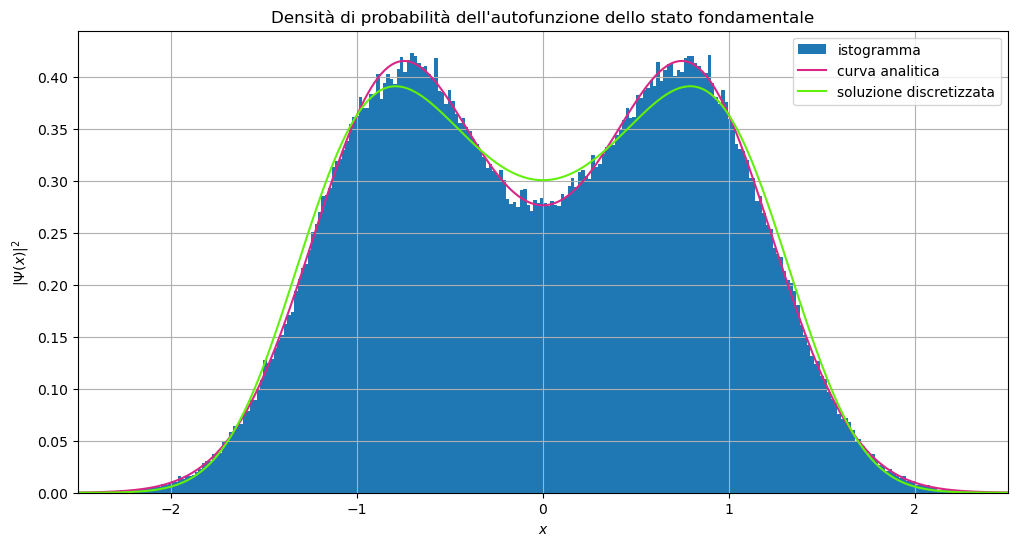

In [8]:
plt.figure(figsize=(12,6))

data, nPoints = importPoints("code/points.out")

nBins = 300
counts, bins = np.histogram(data, nBins)
binWidth = np.ptp(data) / nBins


xBins = bins + binWidth * 0.5
norm = np.sqrt(np.pi) * 2. * sigma * (np.exp(-(mu/sigma)**2) + 1)


plt.stairs(counts / (binWidth * nPoints), bins, fill = True, label = "istogramma")
plt.plot(xBins, psiT(xBins, sigma, mu) * psiT(xBins, sigma, mu) / norm, color = "#d82786", label = "curva analitica")


# matrix method
plt.plot(x,(psi[0])**2, color = "#63f00c", label = "soluzione discretizzata")
plt.title("Densità di probabilità dell'autofunzione dello stato fondamentale")
plt.xlabel("$x$")
plt.ylabel("$|\Psi(x)|^2$")
plt.xlim((-2.5,2.5))

plt.legend()
plt.grid(True)
plt.show()

La soluzione discretizzata, anche se simile, non è compatibile con il risultato del simulated annealing. Infatti siamo partiti da una funzione d'onda di prova che però non ha la forma analitica della vera soluzione, perché appunto quest'ultima non ha forma analitica. Dal primo di questi ultimi specchietti troviamo anche che il valore dell'energia dello stato fondamentale trovato non è compatibile con quello della soluzione discretizzata, per lo stesso motivo.  
L'istogramma invece segue molto bene la curva analitica, come era atteso per dei punti generati con l'algoritmo di Metropolis, utilizzati proprio per campionare tale curva.